# Module 5: SQL & Databases

Topics in this module:

- Connecting to SQLite databases
- SELECT
    - WHERE
    - Wildcards
    - AND / OR
    - NOT
    - GROUP BY
    - INNER JOIN
- INSERT
- UPDATE
- DELETE
    


Besides spreadsheets, archaeological data is often stored in databases. In this module, you'll learn how to access, extract, update and delete information in databases. For now, we'll work with a database that contains information about burial mounds (*grafheuvels* in Dutch), you might recognise this from the BA1 Data Analysis course. The database contains 3 tables: *grafheuvelgroep* (burial mound group), *heuvelperiode* (burial mound period) and *graf* (grave). You can find the Entity Relationship Diagram below: 

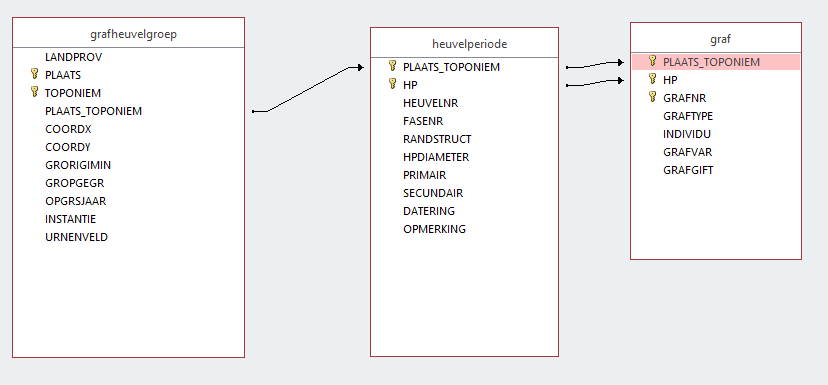

Quick quiz: what is the primary key of the 'graf' table? How is 'grafheuvelgroep' connected to 'heuvelperiode'?

In this module, we'll work with an SQLite database, which is saved as a .sqlite file. Other types of databases that are often used are Microsoft Access (.accdb / .mdb) and MySQL, but these are more difficult to use in Python, which is why we'll stick with SQLlite. If you need to connect to one of these databases for your own work, you can find instructions for Access [here](https://datatofish.com/how-to-connect-python-to-ms-access-database-using-pyodbc/) and for MySQL [here](https://www.w3schools.com/python/python_mysql_getstarted.asp).

When we connect to a SQLite database, we are accessing data that ultimately resides in a file on our computer. SQLite databases are fully featured SQL engines that can be used for many purposes. 

We can connect to a SQLite database using the Python `sqlite3` module, which we can import like any other library:


In [ ]:
import sqlite3

`import sqlite3` gives our Python program access to the `sqlite3` module. 

In [ ]:
connection = sqlite3.connect('../data/grafheuvels.sqlite')
cursor = connection.cursor()

The `sqlite3.connect()` function returns a Connection object that we will use to interact with the SQLite database held in the file `grafheuvels.sqlite`. 

`connection.cursor()` returns a Cursor object. Cursor objects allow us to send SQL statements to a SQLite database using `cursor.execute()`. You don't need to know exactly what these Connection and Cursor objects are, just remember that we need to run both these commands to be able to interact with our database.

Now we are ready to run our first SQL query! Let's select (SELECT) every column (*) from the 'graf' table, and get the first 3 results (LIMIT 3).

In [ ]:
# define query
query = "SELECT * FROM graf LIMIT 3"

# get rows via cursor object, execute function
rows = cursor.execute(query)

# loop through rows and print them
for row in rows:
    print(row)

Great, this works! Although it's not very clear what is what, we just get a list of values for each record. An easier and more clear way of displaying the result of an SQL query is to put it into a DataFrame (yes, more Pandas!). Once we've imported the pandas library, we can use the `read_sql_query` function to run an SQL query on a database Connection object, and put the result in a DataFrame:

In [ ]:
# import pandas
import pandas as pd

# define query
query = "SELECT * FROM graf LIMIT 3"

# run query, display resulting df
pd.read_sql_query(query, connection)

That's a lot easier to understand! Now change the table name in the query above to the other two tables, one at a time (check the ERD to find the names), and run the cell again. This way you can get an idea of what the data looks like in the entire database.

Now we know how to run SQL queries, let's practice some different query types.

## SELECT

We've already run our first SELECT query in the cells above, but let's go into these a bit more. The SELECT query does exactly what it sounds like: it selects a number of records, and returns them so you can inspect them. 

In any query, you can specify which columns you want from a table by specifying them after the query type keyword. So if we want to select just the PLAATS_TOPONIEM column, that would look like this:

In [ ]:
# run query and display result
query = "SELECT PLAATS_TOPONIEM FROM graf"
pd.read_sql_query(query, connection)

Or you can select multiple columns with commas:

In [ ]:
# run query and display result
query = "SELECT PLAATS_TOPONIEM, HP, GRAFVAR FROM graf"
pd.read_sql_query(query, connection)

Try updating the query above to select the INDIVIDU and GRAFGIFT columns.

## Wildcards

You might remember wildcards from the BA1 Data Analysis course. In SQL (and in Access) wildcards are denoted by the asterisk (`*`). You can see a wildcard as a placeholder that means 'anything'. In the first query we did, we used the * to select all the columns, and most often you will use this as it generally makes sense to see all the columns.

In [ ]:
# run query and display result
query = "SELECT * FROM graf"
pd.read_sql_query(query, connection)

Update the above query to retrieve the data from the 'grafheuvelgroep' table instead.

## Using WHERE to get certain records

Showing all the records of a table is useful to get a feel for the data, but generally we will want to query a subset of records. This can be done using the WHERE keyword. We define a SELECT query like before, but then add the WHERE keyword, followed by one or more conditions. These conditions are very similar to Python `if` statements! For example, we can select all records where the grave type (GRAFTYPE) is secondary (sec):

In [ ]:
# run query and display result
query = "SELECT * FROM graf WHERE GRAFTYPE == 'sec'"
pd.read_sql_query(query, connection)

Quick quiz: How many graves are secondary? 
    
Besides finding records where a column is equal to a value (using `==`), we can also use the bigger than (`>`) and smaller than (`<`) symbols (but this only works on numerical columns, so data type INT or FLOAT). Let's get all burial mounds that have been excavated after 1960 (OPGRSJAAR = excavation year):

In [ ]:
# run query and display result
query = "SELECT * FROM grafheuvelgroep WHERE OPGRSJAAR > 1960"
pd.read_sql_query(query, connection)

Quick quiz: what do you think the '9999' means in some of the records? Now update the query to get all burial mounds from before 1950,

We can also use wildcards in conditions, using the LIKE keyword! Unfortunately though, Access uses `*` for wildcards in conditions (which you might remember), but SQLlite uses `%`, so this might be a bit confusing.. But let's give this a go.

For example, in the grave table, there's a column called GRAFVAR, containing descriptions on what type of burial it is. Cremations are denoted with the code 'crem', let's find these:



In [ ]:
# run query and display result
query = "SELECT * FROM graf WHERE GRAFVAR LIKE '%crem%'"
pd.read_sql_query(query, connection)

The LIKE keyword indicates we are about to do a search in a text field, and then we specify the wildcards with `%` around the word 'crem' (Wildcards don't work when using `==`). In this way, we tell SQL that we want all records where the string 'crem' occurs somewhere in the GRAFVAR field. Or more technically put, '%crem%' is a pattern that means 'any amount of any characters' + 'crem' + 'any amount of any characters'.

To practice, change the query above to search for all graves in hollowed out trees (coded as 'bmkist', *boomkist* in Dutch).

## AND / OR statements

Just like Python `if` statements, we can also combine multiple conditions using the OR and AND keywords. We might want to see all records where a cremation occurred in a *boomkist*, so in the WHERE statement we specify both conditions, and add AND in between them:

In [ ]:
# run query and display result
query = "SELECT * FROM graf WHERE GRAFVAR LIKE '%crem%' AND GRAFVAR LIKE '%bmkist%' "
pd.read_sql_query(query, connection)

A small tip: if a string you are defining is getting very long and complicated (like the query above), you can also split the string over multiple lines by using a backslash (`\`) at the end of each line. Either way will return the same result, but sometimes it's easier to read your code like this:

In [ ]:
# run query and display result
query = " \
    SELECT * \
    FROM graf \
    WHERE \
        GRAFVAR LIKE '%crem%' AND \
        GRAFVAR LIKE '%bmkist%' \
"
pd.read_sql_query(query, connection)

The above query is checking for values in one column, of course we can also combine conditions across different columns. To find all cremations in a primary grave:

In [ ]:
# run query and display result
query = " \
    SELECT * \
    FROM graf \
    WHERE \
        GRAFVAR LIKE '%crem%' AND \
        GRAFTYPE == 'pri' \
"
pd.read_sql_query(query, connection)

The previous 2 queries used the AND keyword, which returns records where both conditions match. The OR keyword is used when just 1 of the conditions needs to be true. So for example, if we're looking for graves in urns (*urn*) or pits (*kuil*):

In [ ]:
# run query and display result
query = " \
    SELECT * \
    FROM graf \
    WHERE \
        GRAFVAR LIKE '%urn%' OR \
        GRAFVAR LIKE '%kuil%' \
"
pd.read_sql_query(query, connection)

## NOT 

Up to this point, we've only executed SELECT queries where we are looking for a specific value to be present in a column. It's also possible to search for records that *do not* contain a certain value, using the NOT keyword. For example, let's find all graves that are *not* a cremation:

In [ ]:
# run query and display result
query = "SELECT * FROM graf WHERE GRAFVAR NOT LIKE '%crem%' "
pd.read_sql_query(query, connection)

## GROUP BY

Similar to DataFrames, we can also group by a column in SQL, using the GROUP BY keyword. Just like in Pandas, when executing a group, we also need to tell SQL what to display for each group, e.g. a count, sum or mean. This is defined in the section where we tell SQL which columns we want to fetch, so just after the SELECT keyword. To illustrate this, the below query shows all edge structures (RANDSTRUCT) and how many times they occur in the *heuvelperiode* table:

In [ ]:
# run query and display result
query = " \
    SELECT RANDSTRUCT, COUNT(RANDSTRUCT) \
    FROM heuvelperiode \
    GROUP BY RANDSTRUCT \
"
pd.read_sql_query(query, connection)

We can also get a SUM instead of a COUNT, for example if we want to see how many burial mounds have been found in total (GRORIGIMIN), for each area (LANDPROV):

In [ ]:
# run query and display result
query = " \
    SELECT LANDPROV, SUM(GRORIGIMIN) \
    FROM grafheuvelgroep \
    GROUP BY LANDPROV \
"
mounds_per_region = pd.read_sql_query(query, connection)

So here we can see that the vast majority of burial mounds are from 'nl-nbr', meaning Netherlands - Noord Brabant province. Let's quickly visualise this in a bar chart! We'll use Pandas built-in bar plot function for this, which is easy and means we don't need to import Seaborn, but does mean you get way less customisation options.

In [ ]:
mounds_per_region.plot.bar(x='LANDPROV', y='SUM(GRORIGIMIN)')

## INNER JOIN

As mentioned at the start of this module, SQL can be more powerful than just converting a database to CSV and opening them as DataFrames, by using INNER JOIN. This keyword allows you to get and combine information across multiple tables, and store the result in a single table / DataFrame for analysis. 

Technically, an inner join selects records that have matching values in 2 tables, which looks something like this:

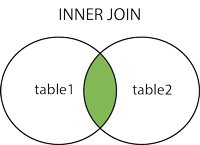

But like most things, it's easier to explain with an example. Say we want to see if there's any correlation or pattern between the edge structure (RANDSTRUCT in the *heuvelperiode* table) and whether or not it is an urn field (URNENVELD in the *grafheuvelgroep* table, *j* = yes, *n* = no). We can do an INNER JOIN to get information from both of these tables, and we'll connect them through the primary key of *grafheuvelgroep*, which is how it is connected to *heuvelperiode* (check the ERD at the top if you're unsure of the relationship). To connect 2 tables, we use the ON keyword, followed by which fields are used as the primary key:

In [ ]:
# run query and display result
query = " \
    SELECT * \
    FROM grafheuvelgroep \
    INNER JOIN heuvelperiode \
    ON grafheuvelgroep.PLAATS_TOPONIEM = heuvelperiode.PLAATS_TOPONIEM \
"
pd.read_sql_query(query, connection)

Did you see that we used the name of the table, then a dot, and then the name of the field after ON? Because SQL is now dealing with 2 tables, we need to let it know which table we mean when we specify a column, as the same column name can be present in both tables. 

The above result is way too big to easily interpret, so let's limit the number of columns we would like to see, again using this `table.column` syntax:

In [ ]:
# run query and display result
query = " \
    SELECT grafheuvelgroep.URNENVELD, heuvelperiode.RANDSTRUCT \
    FROM grafheuvelgroep \
    INNER JOIN heuvelperiode \
    ON grafheuvelgroep.PLAATS_TOPONIEM = heuvelperiode.PLAATS_TOPONIEM \
"
pd.read_sql_query(query, connection)

Ok, that's a bit more manageable, but to easily scan the result, let's sort the columns so we can more easily see patterns in the data, using the ORDER BY keyword. We'll also set the max rows to display by Pandas to 200, so we can actually scroll through all of the result. 

In [ ]:
# set max rows setting in pandas
pd.set_option('display.max_rows', 500)

# run query and display result
query = " \
    SELECT grafheuvelgroep.URNENVELD, heuvelperiode.RANDSTRUCT \
    FROM grafheuvelgroep \
    INNER JOIN heuvelperiode \
    ON grafheuvelgroep.PLAATS_TOPONIEM = heuvelperiode.PLAATS_TOPONIEM \
    ORDER BY grafheuvelgroep.URNENVELD, heuvelperiode.RANDSTRUCT \
"
pd.read_sql_query(query, connection)

It's already possible to see some patterns, but to condense the information even further, let's add a GROUP BY:

In [ ]:
# run query and display result
query = " \
    SELECT grafheuvelgroep.URNENVELD, heuvelperiode.RANDSTRUCT, COUNT(heuvelperiode.RANDSTRUCT) \
    FROM grafheuvelgroep \
    INNER JOIN heuvelperiode \
    ON grafheuvelgroep.PLAATS_TOPONIEM = heuvelperiode.PLAATS_TOPONIEM \
    GROUP BY grafheuvelgroep.URNENVELD, heuvelperiode.RANDSTRUCT  \
"
pd.read_sql_query(query, connection)

Great, now we can see some interesting patterns! For example, *pk type 5* (ring of posts, type 5) only occurs in urn fields, and *steenkrans* only occurs outside urn fields. I'm sure Bronze Age / Iron Age scholars have got something interesting to say about that, but that's outside the scope of a programming course!

## INSERT INTO

Up to this point, we have selected data from the database, but we have not edited anything. Editing databases is generally done in forms created by various software (i.e. the forms in Microsoft Access), but sometimes it can be useful to edit tables with Python. We'll briefly go over how to do this, starting with INSERT INTO, which allows you to insert a new record into an existing table. 

Let's say we found a new grave (*graf*) in a burial mound that's already in the database. We can then add a record by typing INSERT INTO, then the table name (*graf*), and then in brackets all the columns you want to enter data into (which doesn't have to be all of them!). Then we enter the values by using VALUES, and put all of the values in brackets.

In [ ]:
# run query 
query = " \
    INSERT INTO graf (PLAATS_TOPONIEM, HP, GRAFNR, GRAFTYPE, INDIVIDU, GRAFVAR,GRAFGIFT) \
    VALUES ('alphen-kwaalburg', '1', '2', 'sec', '-', 'crem. in urn', 'speerpunt') \
"
cursor.execute(query)

You might have noticed we've gone back to using `cursor` instead of `pd.read_sql_query`. This is because we are adding data, meaning SQL returns no result, so there's no data to go into a DataFrame (and trying to do so will cause an error!). Instead, let's check the data has been entered correctly with a SELECT query:

In [ ]:
# run query and display result
query = "SELECT * FROM graf WHERE PLAATS_TOPONIEM == 'alphen-kwaalburg' "
pd.read_sql_query(query, connection)

The first record is the grave that was already in the database, and the second one is the record we just added, it worked!

## UPDATE

Besides adding new records, we can also edit existing records using the UPDATE keyword. Let's say we made a mistake in adding the previous record: instead of a *speerpunt* (spearhead) it should be a *pijlpunt* (arrowhead) in the GRAFGIFT column. We then select the record by a WHERE clause, where we specify the primary key (PLAATS_TOPONIEM + HP + GRAFNR), and use SET to update the GRAFGIFT column. Once updated, we run the SELECT query again to check everything worked.

In [ ]:
# run query 
query = " \
    UPDATE graf \
    SET GRAFGIFT = 'pijlpunt' \
    WHERE PLAATS_TOPONIEM == 'alphen-kwaalburg' AND HP == '1' AND GRAFNR == '2' \
"
cursor.execute(query)

# run query and display result
query = "SELECT * FROM graf WHERE PLAATS_TOPONIEM == 'alphen-kwaalburg' "
pd.read_sql_query(query, connection)

## DELETE FROM

And finally, we can delete rows by using the DELETE FROM keyword, followed by a WHERE statement. Any records that match the WHERE condition will be deleted without any sort of confirmation, so be careful when you use this!

In [ ]:
# run query 
query = " \
    DELETE FROM graf \
    WHERE PLAATS_TOPONIEM == 'alphen-kwaalburg' AND HP == '1' AND GRAFNR == '2' \
"
cursor.execute(query)

# run query and display result
query = "SELECT * FROM graf WHERE PLAATS_TOPONIEM == 'alphen-kwaalburg' "
pd.read_sql_query(query, connection)

When you're done with running queries on a database, it is wise to close the connection, as connections that stay open can cause errors in the database. This is especially important if you're using a database at the same time as someone else!

In [ ]:
# close the connection to the database
connection.close()

## Exercises

Time to practice some SQL! Try and complete the following steps, each in it's own cell:

- Connect to the grafheuvels.sqlite database by creating a Connection and a Cursor object
- Select the burial mound groups (*grafheuvelgroep*) located in 'berghem'
- Create a list of graves where grave gifts were discovered (GRAFGIFT column). Try and figure out whether primary graves are 'richer' than secondary graves (hint: ORDER BY). Only include the GRAFTYPE and GRAFGIFT columns. 
- Select all burial mound periods (*heuvelperiode*) from the Early-Mid Bronze Age ("MBT A"). You should get 99 records.
- Select all burial mound periods where the edge structure (RANDSTRUCT) consists of a circular ditch (*ringsloot*). You should get 69 records.
- Count the number of teams each unique edge structure occurs. Which occurs the most often?
- Find all cremations (*crem.* in graf.GRAFVAR) from the Early-Mid Bronze Age ("MBT A" in heuvelperiode.DATERING). You should get 63 records.
- Add a new record in *heuvelperiode* with "leiden-vansteenis" as PLAATS_TOPONIEM and "1" as HP, leave the other columns blank. Check it has worked by a SELECT query.
- Edit the record you just added: change RANDSTRUCT to "stenen muur" and DATERING to "modern". Check it has worked by a SELECT query.
- Delete the record we've just added and edited.
- Close the connection.